## Validation, regularisation and callbacks

In [62]:
import tensorflow as tf
tf.__version__

'2.3.0'

##### Load the data

In [63]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [64]:
print(diabetes_dataset.keys())

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [65]:
targets = (targets - targets.mean(axis = 0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

### Validation

In [66]:
# Split the dataset

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


##### Train a feedforward neural network model

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
                      Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(128, activation='relu'),
                      Dense(1)
  ])
  return model

model = get_model()

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_37 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_39 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

In [69]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [70]:
history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [71]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.9287 - mae: 0.7308


[0.9287431240081787, 0.73076993227005]

##### Plot the learning curves

In [72]:
import matplotlib.pyplot as plt

def plotLoss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

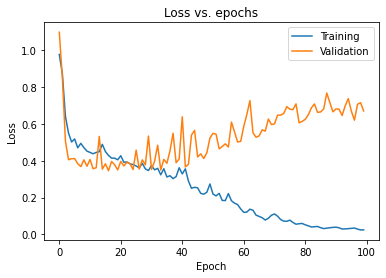

In [73]:
plotLoss(history)

### Regularisation

In [74]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [75]:
def get_regularised_model(wd, rate):
  model = Sequential([
                      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
                      Dropout(rate),
                      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
                      Dropout(rate),
                      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
                      Dropout(rate),
                      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
                      Dropout(rate),
                      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
                      Dropout(rate),
                      Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
                      Dropout(rate),
                      Dense(1)
  ])
  return model

In [76]:
model = get_regularised_model(1e-5, 0.3)

In [77]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [78]:
history = model.fit(train_data, train_targets, epochs=100,
                    validation_split=0.15, batch_size=64, verbose=False)

In [79]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4917 - mae: 0.5552


[0.49169352650642395, 0.5551758408546448]

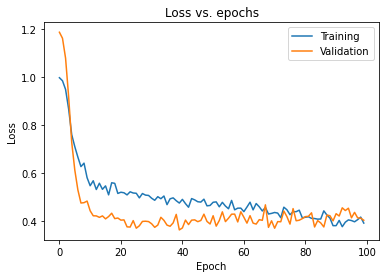

In [80]:
plotLoss(history)

### Callbacks

In [81]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self, logs=None):
    print("Starting training...")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Starting batch {batch}")

  def on_train_batch_end(self, batch, logs=None):
    print(f"Training: Finished batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, logs=None):
    print("Finished training!")


In [82]:
model = get_regularised_model(1e-5, 0.3)

In [83]:
model.compile(optimizer="adam", loss="mse")

In [84]:
model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [85]:
class TestingCallback(Callback):
  def on_test_begin(self, logs=None):
    print("Starting testing...")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Testing: Starting batch {batch}")

  def on_test_batch_end(self, batch, logs=None):
    print(f"Testing: Finished batch {batch}")

  def on_test_end(self, logs=None):
    print("Finished testing!")

In [86]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


0.8085802793502808

In [87]:
class PredictionCallback(Callback):
  def on_predict_begin(self, logs=None):
    print("Starting prediction...")

  def on_predict_batch_begin(self, batch, logs=None):
    print(f"Prediction: Starting batch {batch}")

  def on_predict_batch_end(self, batch, logs=None):
    print(f"Prediction: Finished batch {batch}")

  def on_predict_end(self, logs=None):
    print("Finished prediction!")

In [88]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.03931485],
       [ 0.00609791],
       [ 0.04193491],
       [ 0.06980792],
       [ 0.06629064],
       [ 0.00383159],
       [ 0.03420728],
       [ 0.04301227],
       [ 0.0698045 ],
       [ 0.05264168],
       [ 0.05925111],
       [ 0.05192648],
       [ 0.0618074 ],
       [ 0.07227758],
       [ 0.05632944],
       [ 0.06265166],
       [ 0.05135651],
       [-0.00281404],
       [ 0.02958008],
       [ 0.07378095],
       [ 0.00726515],
       [ 0.02721499],
       [ 0.061664  ],
       [ 0.02281524],
       [ 0.03443199],
       [-0.00044795],
       [ 0.05182932],
       [ 0.06948476],
       [ 0.04675271],
       [ 0.05761104],
       [ 0.06634073],
       [ 0.05427381],
       [ 0.0587967 ],
       [ 0.02236465],
       [ 0.03326401],
       [ 0.04376989],
       [ 0.0004074 ],
       [ 0.05309562],
       [ 0.06532045],
       [ 0.06473693],
       [ 0.06702059],
       [ 0.03543373],
       [-0.017127  ],
       [ 0.06141342],
       [ 0.06787433]], dtype=flo

### Early stopping / Patience

In [105]:
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=False,
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [106]:
unregularised_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4595


0.4594855308532715

In [107]:
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_targets, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=False,
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

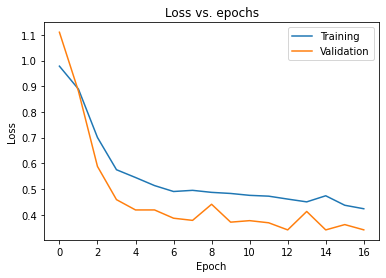

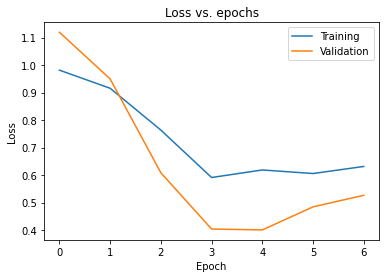

In [108]:
plotLoss(unreg_history)
plotLoss(reg_history)